# Nội dung chính
1. Lý thuyết mạng RNN
2. Xây dựng mạng RNN bằng Python
3. Xây dựng mạng RNN bằng Tensorflow
4. Xây dựng mạng RNN bằng Keras

Nguồn:
- https://nttuan8.com/bai-13-recurrent-neural-network/
- http://web.stanford.edu/class/cs20si/syllabus.html
- https://dominhhai.github.io/vi/2017/10/implement-rnn-with-python/
- https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/recurrent_network.ipynb
* https://dominhhai.github.io/vi/2017/10/what-is-rnn/
* https://github.com/dennybritz/rnn-tutorial-rnnlm/blob/master/RNNLM.ipynb

# 1. Lý thuyết mạng RNN
Trong các bài trước, chúng ta đã cùng tìm hiểu về mạng neural, nó đem lại những tính chất dường như là vi diệu, tuy nhiên, các mô hình này có vẻ vẫn còn hạn chế. Các input chúng ta đưa vào hoàn toàn độc lập với nhau. Trên thực tế, rất nhiều dữ liệu cũng như sự vật trong cuộc sống có mối tương quan chứ không hề độc lập với nhau. Ví như như 1 video bao gồm nhiều frame nối tiếp nhau, âm nhạc cũng là một dạng chuỗi tuần tự âm thanh, các text xử lý cũng là dạng chuỗi tuần tự... Câu hỏi đặt ra là vậy làm thế nào chúng ta có thể làm cho mô hình của chúng ta có khả năng xử lý chuỗi theo như cách làm của con người.

RNN được tạo ra với mục đích nắm bắt được thông tin dạng chuỗi. Simple Recurrent Network (SRN) được giới thiệu lần đầu bởi Jeff Elman trong paper "Finding structure in time" (Elman, 1990). RNN được gọi là hồi quy (Recurrent) bởi lẽ chúng thực hiện cùng một tác vụ cho tất cả các phần tử của một chuỗi với đầu ra phụ thuộc vào cả các phép tính trước đó. Nói cách khác, RNN có khả năng nhớ các thông tin được tính toán trước đó. Trên lý thuyết, RNN có thể sử dụng được thông tin của một văn bản rất dài, tuy nhiên thực tế thì nó chỉ có thể nhớ được một vài bước trước đó (ta cùng bàn cụ thể vấn đề này sau) mà thôi. Về cơ bản một mạng RNN có dạng như sau:

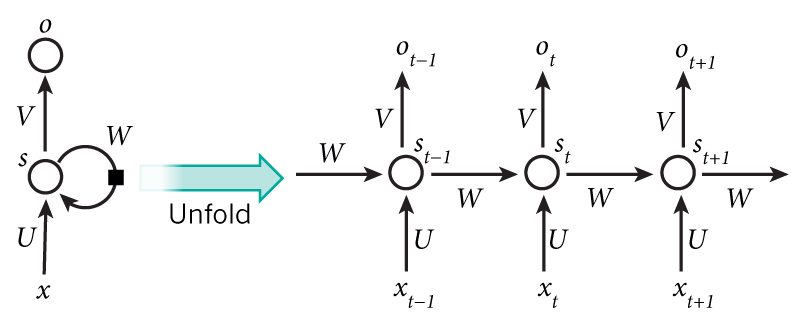

In [1]:
from IPython.display import display, Image
display(Image(filename='./images/rnn.jpg'))

Mô hình trên mô tả phép triển khai nội dung của một RNN. Triển khai ở đây có thể hiểu đơn giản là ta vẽ ra một mạng nơ-ron chuỗi tuần tự. Ví dụ ta có một câu gồm 5 chữ “Đẹp trai lắm gái theo”, thì mạng nơ-ron được triển khai sẽ gồm 5 tầng nơ-ron tương ứng với mỗi chữ một tầng. Lúc đó việc tính toán bên trong RNN được thực hiện như sau:
* $x_t$ là đầu vào bước $t$. Ví dụ, $x_1$ là một vector one-hot tương ứng với từ thứ 2 của câu (trai).
* $s_t$ là trạng thái ẩn tại bước $t$. Nó chính là **bộ nhớ** của mạng, $s_t$ được tính toán dựa trên cả các trạng thái ẩn phía trước và đầu vào tại bước đó: $s_t = f(U x_t + W s_{t-1})$. Hàm $f$ thường là một hàm phi tuyến như tanh hoặc ReLu... Để làm phép toán cho phần tử đầu tiên, ta cần khởi tạo thêm $s_{-1}$, thường giá trị khởi tạo là 0.
* $o_t$ là đầu ra tại bước $t$. Ví dụ ta muốn dự đoán từ tiếp theo có thể xuất hiện trong câu thì $o_t$ chính là một vector xác suất các từ trong danh sách từ vựng của ta: $o_t=g(V s_t)$. $g$ thường là hàm softmax trong bài toán phân loại.

Tóm lại ta có công thức: 
$$s_{t+1} = f(U x_{t+1} + W s_{t})$$
$$o_{t+1} = g(V s_{t+1}) $$
Có thể có thêm các hệ số bias trong công thức trên, trong đó:
* $x_t$ là input vector tại bước t
* $s_t$ là vector lớp ẩn tại bước t
* $o_t$ là output vector tại bước t
* $U, V, W$ là các ma trận tham số ta cần học
* $f, g$ là các hàm activation

Trực quan trên mô hình mạng neural, chúng ta có thể thấy mạng như sau. Tại bước thứ 0: mạng nhận vào input và sinh ra các lớp ẩn:

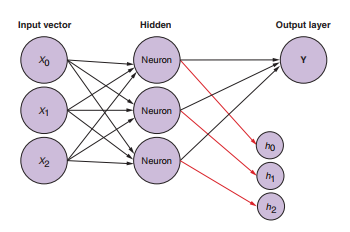

In [2]:
display(Image(filename='./images/rnn-step0.png'))

Tại bước 1, output của lớp 0 sẽ được đưa vào lớp ẩn như là input:

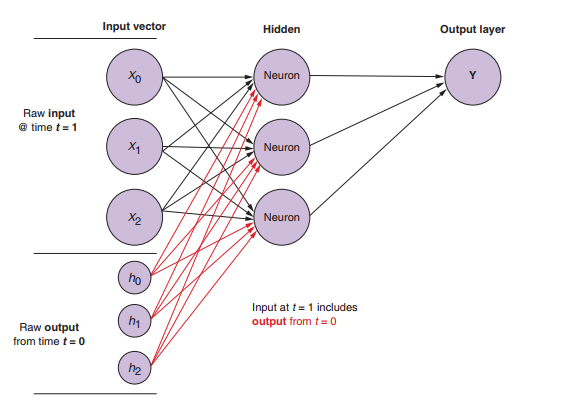

In [3]:
display(Image(filename='./images/rnn-step1.png'))

## 1.1 Loss fuction
Với bài toán phân loại, chúng ta thường sử dụng hàm cross entropy:
$$E(y, \hat{y}) = \sum_t E_t (y_t, \hat{y}_t)$$

## 1.2 Lan truyền ngược

Nhắc lại công thức lan truyền tiến:
$$s_{t+1} = f(U x_{t+1} + W s_{t})$$
$$o_{t+1} = g(V s_{t+1}) $$
Trong đó $o_{t+1} = \hat{y}$ là output cuối cùng của RNN.

Trong RNN, loss của cả mô hình bằng tổng loss của mỗi output. Các tham số chúng ta cần phải tìm là $U, V, W$. Ta cần tính:
$$ \frac{\partial L}{\partial U}, \frac{\partial L}{\partial V}, \frac{\partial L}{\partial W}$$
Tính đạo hàm với $V$ thì khá đơn giản, ta có $o_{t+1}$ là đầu ra cuối cùng của chúng ta. Do đó:
$$ \frac{\partial L}{\partial V} = \frac{\partial L}{\partial o_{t+1}} * \frac{\partial o_{t+1}}{\partial V}$$

Tiếp theo, đạo hàm với $U, W$ thì có:
$$\frac{\partial L}{\partial U} = \frac{\partial L}{\partial o_{t+1}} * \frac{\partial o_{t+1}}{\partial s_{t+1}} * \frac{\partial s_{t+1}}{\partial U} = \frac{\partial L}{\partial o_{t+1}} * \frac{\partial o_{t+1}}{\partial s_{t+1}} * \frac{\partial s_{t+1}}{\partial s_{t}}*...*\frac{\partial s_1}{\partial U}$$
$$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial o_{t+1}} * \frac{\partial o_{t+1}}{\partial s_{t+1}} * \frac{\partial s_{t+1}}{\partial U} = \frac{\partial L}{\partial o_{t+1}} * \frac{\partial o_{t+1}}{\partial s_{t+1}} * \frac{\partial s_{t+1}}{\partial s_{t}}*...*\frac{\partial s_1}{\partial W}$$

Từ công thức trên, Đầu ra của bài toán chúng ta thường xét dạng xác suất nên giá trị đầu ra từ 0 đến 1. Từ đó, ta thấy có xảy ra hiện tức **vanishing gradient** (tức là nhiều đạo hàm liên tiếp nhỏ hơn 1 nhân với nhau - nếu dãy nhân nhau dài sẽ dấn đến hội tụ về 0 ==> từ đó gây ra hiện tượng "không nhớ"). Còn nếu ngược lại gọi là **exploding gradient** (tích của rất nhiều số lớn hơn 1 sẽ dấn đến vô cùng làm cho bước cập nhật hệ số gradient không còn chính xác). Điều này sẽ được cải tiến trong mô hình LSTM sau này.

## 1.3 RNN mở rộng
Trong nhiều năm, các nhà nghiên cứu đã phát triển nhiều kiểu RNN tinh vi để xử lý các nhược điểm của mô hình RNN truyền thống. Chúng ta sẽ xem chi tiết một vài mô hình đó ở các bài viết sau, còn ở bài này, tôi chỉ giới thiệu ngắn ngọn 2 mô hình dưới đây.
### 1.3.1 RNN 2 chiều
Ở mô hình RNN 2 chiều (Bidirectional RNN), đầu ra tại bước \color{blue}tt không những phụ thuộc vào các phần tử phía trước mà còn phụ thuộc cả vào các phần tử phía sau. Ví dụ, để dự đoán từ còn thiếu trong câu, thì việc xem xét cả phần trước và phần sau của câu là cần thiết. Vì vậy, ta có thể coi mô hình là việc chồng 2 mạng RNN ngược hướng nhau lên nhau. Lúc này đầu ra được tính toán dựa vào cả 2 trạng thái ẩn của 2 mạng RNN ngược hướng này.

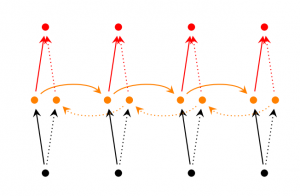

In [4]:
display(Image(filename='./images/bidirectional-rnn-300x196.png'))

# 1.3.2 RNN (2 chiều) sâu
RNN sâu (Deep (Bidirectional) RNN) cũng tương tự như RNN 2 chiều, nhưng khác nhau ở chỗ chúng chứa nhiều tầng ẩn ở mỗi bước. Trong thực tế, chúng giúp cho việc học ở mức độ cao hơn, tuy nhiên ta cũng cần phải có nhiều dữ liệu huấn luyện hơn.

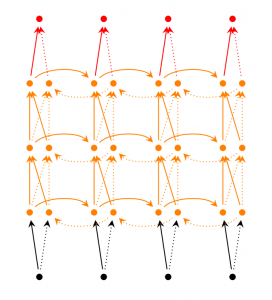

In [5]:
display(Image(filename='./images/Screen-Shot-2015-09-16-at-2.21.51-PM-272x300.png'))

# 2. Xây dựng mạng RNN bằng Python

Để hiểu sâu hơn về cách hoạt động của mô hình RNN, trong phần này, chúng ta sẽ cùng xây dựng mô hình RNN sinh ra các câu hội thoại (hay còn gọi là mô hình ngôn ngữ). Tôi sử dụng <a href="./reddit-comments-2015-08.csv">15000 bình luận trên Reddit</a> của <a href="https://console.cloud.google.com/bigquery/?GK=fh-bigquery&page=table&t=2015_08&d=reddit_comments&p=fh-bigquery&redirect_from_classic=true">BigQuery của Google</a>. Và hy vọng các văn bản sinh ra trông có vẻ như người dùng của Reddit. Cũng như các dự án học máy khác, đầu tiên ta cần xử lý dữ liệu thô cho đúng định dạng đầu vào.
## 2.1 Phân rã dữ liệu thô
Ta có dữ liệu văn bản thô, nhưng ta lại muốn dự đoán từng từ một, nên ta cần phải phân ra dữ liệu ta thành từng từ riêng biệt. Đầu tiên ta sẽ phân ra thành từng câu một, sau đó lại phân câu thành từng từ riêng biệt. Ta có thể chia các bình luận bằng dấu cách, nhưng cách đó không giúp ta phân tách được các dấu chấm câu. Ví dụ: “He left!” cần phải chia thành 3 phần: “He”, “left”, ”!”. Để đỡ phải vất vả, ta sẽ sử dụng NLTK với hàm word_tokenize và sent_tokenize để phân tách dữ liệu. Ví dụ:

In [6]:
import nltk
nltk.word_tokenize("Thắng đẹp trai thế nhỉ!")

['Thắng', 'đẹp', 'trai', 'thế', 'nhỉ', '!']

## 2.2 Loại bỏ stop word
Trong hầu hết các văn bản có những từ chỉ xuất hiện 1 hoặc 2 lần, những từ không xuất hiện thường xuyên như thế này ta hoàn toàn có thể loại bỏ. Càng nhiều từ thì mô hình của ta học càng chậm (ta sẽ nói lý do sau), và chúng ta không có nhiều ví dụ sử dụng những từ đó nên không thể nào mà học cách sử dụng chúng sao cho chính xác được. Việc này cũng khá giống với cách con người học. Để hiểu cách sử dụng một từ chuẩn xác, bạn cần phải xem xét nó ở nhiều ngữ cảnh khác nhau.

Ta sẽ giới hạn lượng từ vựng phổ biến của ta bằng biến `vocabulary_size` (ở đây, tôi để là 8000, nhưng bạn cứ thay đổi nó thoải mái). Những từ ít gặp không nằm trong danh sách các từ phổ biến, ta sẽ thay thế nó bằng `UNKNOWN_TOKEN`. Ví dụ, nếu danh sách vựng của ta không có từ `“nonlinearities”` thì câu `“nonlineraties are important in Neural Networks”` sẽ được chuyển hoá thành `“UNKNOWN_TOKEN are important in Neural Networks”`. Ta sẽ coi `UNKNOWN_TOKEN` cũng là 1 phần của danh sách từ vựng và cũng sẽ dự đoán nó như các từ khác. Khi một từ mới được sinh ra, ta có thể thay thế `UNKNOWN_TOKEN` lại bằng cách lấy ngẫu nhiên một từ nào đó không nằm trong danh sách từ vựng của ta, hoặc ta có thể tạo ra một các từ cho tới khi từ được sinh ra nằm trong danh sách từ của ta.
## 2.3 Thêm ký tự đầu, cuối
Ta cũng muốn xem từ nào là từ bắt đầu và từ nào là từ kết thúc của một câu. Để làm được chuyện đó, ta cần phải thêm vào 2 kí tự đặc biệt cho mỗi câu là: `SENTENCE_START` liền trước câu và `SENTENCE_END` liền sau câu. Nó sẽ cho phép ta đặt câu hỏi là: Giờ ta có một từ là `SENTENCE_START`, thì từ tiếp theo của ta sẽ là gì? Từ tiếp theo chính là từ đầu tiên của câu.

## 2.4 Ma trận hoá dữ liệu
Đầu vào của RNN là các vec-tơ chứ không phải là các chuỗi. Nên ta cần chuyển đổi giữa các từ và địa chỉ tương ứng với `index_to_word` và `word_to_index`. Ví dụ, từ `“friendly”` ở vị trí 2001 trong danh sách từ vựng thì địa chỉ của nó sẽ là 2001. Như vậy tập dữ liệu x của sẽ có dạng: `[0, 179, 314, 416]`, trong đó 0 tương ứng với `SENTENCE_START`. Còn các nhãn (dự đoán) y sẽ là `[179, 341, 416, 1]`, trong đó 1 tương ứng với `SENTENCE_END`. Vì mục tiêu của ta là dự đoán các từ tiếp theo, nên y đơn giản là dịch một vị trí so với x, và kết câu là `SENTENCE_END`. Nói cách khác, với dự đoán chuẩn xác cho từ 179 sẽ là 314.

In [7]:
import pandas as pd

vocabulary_size = 8000
unknown_token = "UNKNOWN_TOKEN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"

data = pd.read_csv('reddit-comments-2015-08.csv')

In [8]:
data

,body
0,I joined a new league this year and they have ...
1,"In your scenario, a person could just not run ..."
2,They don't get paid for how much time you spen...
3,"I dunno, back before the August update in an A..."
4,"No, but Toriyama sometimes would draw himself ..."
...,...
14995,I've got such a good feeling about this season...
14996,insider rank (no cute sign cuz that will make ...
14997,See here for why this isn't as clear a compari...
14998,&gt; If you cannot stop the bleeding by apply...


In [9]:
sentences = data['body'].to_list()
 # Append SENTENCE_START and SENTENCE_END
sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]

In [10]:
sentences[:1]

["SENTENCE_START I joined a new league this year and they have different scoring rules than I'm used to. It's a slight PPR league- .2 PPR. Standard besides 1 points for 15 yards receiving, .2 points per completion, 6 points per TD thrown, and some bonuses for rec/rush/pass yardage. My question is, is it wildly clear that QB has the highest potential for points? I put in the rules at a ranking site and noticed that top QBs had 300 points more than the top RB/WR. Would it be dumb not to grab a QB in the first round? SENTENCE_END"]

In [11]:
print("Xử lý %d sentences"%(len(sentences)))

Xử lý 15000 sentences


In [12]:
# tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

In [13]:
import itertools
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print("Found %d unique words tokens." % len(word_freq.items()))

Found 76325 unique words tokens.


In [14]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)

In [15]:
vocab[:5]

[('.', 68328), (',', 52137), ('the', 48270), ('to', 35179), ('a', 30853)]

In [16]:
index_to_word = [x[0] for x in vocab]

In [17]:
index_to_word.append(unknown_token)

In [18]:
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])

In [19]:
print("Using vocabulary size %d." % vocabulary_size)
print("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))


Using vocabulary size 8000.
The least frequent word in our vocabulary is 'reliably' and appeared 10 times.


In [20]:
# Replace all words not in our vocabulary with the unknown token
for i, sent in enumerate(tokenized_sentences):
    tokenized_sentences[i] = [w if w in word_to_index else unknown_token for w in sent]

In [21]:
print("Example sentence: \n'%s'" % sentences[0])
print("Example sentence after Pre-processing: \n'%s'" % tokenized_sentences[0])

Example sentence: 
'SENTENCE_START I joined a new league this year and they have different scoring rules than I'm used to. It's a slight PPR league- .2 PPR. Standard besides 1 points for 15 yards receiving, .2 points per completion, 6 points per TD thrown, and some bonuses for rec/rush/pass yardage. My question is, is it wildly clear that QB has the highest potential for points? I put in the rules at a ranking site and noticed that top QBs had 300 points more than the top RB/WR. Would it be dumb not to grab a QB in the first round? SENTENCE_END'
Example sentence after Pre-processing: 
'['SENTENCE_START', 'I', 'joined', 'a', 'new', 'league', 'this', 'year', 'and', 'they', 'have', 'different', 'scoring', 'rules', 'than', 'I', "'m", 'used', 'to', '.', 'It', "'s", 'a', 'slight', 'PPR', 'UNKNOWN_TOKEN', 'UNKNOWN_TOKEN', 'PPR', '.', 'UNKNOWN_TOKEN', 'besides', '1', 'points', 'for', '15', 'yards', 'receiving', ',', 'UNKNOWN_TOKEN', 'points', 'per', 'completion', ',', '6', 'points', 'per', 'TD

In [22]:
import numpy as np
# Create the training data
X_train = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences])
y_train = np.asarray([[word_to_index[w] for w in sent[1:]] for sent in tokenized_sentences])

## 2.5 Xây dựng mạng RNN

Đầu vào $x$ sẽ là một chuỗi các từ và mỗi $x_t$ sẽ là một từ đơn. Nhưng vì phép nhân ma trận không cho phép ta sử dụng một địa chỉ của từ để làm việc, nên ta phải biểu diễn từ đó bằng véc-tơ one-hot với kích thước là `vocabulary_size`. Ví dụ, từ có địa chỉ là 36 thì sẽ có véc-tơ tương ứng là: vị trí thứ 36 là 1, còn lại là 0 cả. Vì mỗi $x_t$ là một véc-tơ, nên $x$ lúc này sẽ là một ma trận với mỗi hàng biểu diễn một từ. Ta sẽ thực hiện việc chuyển đổi này ở phần mã mạng nơ-ron chứ không thực hiện ở phần tiền xử lý. Đầu ra của mạng oo cũng sẽ có dạng tương tự. Mỗi $o_t$ là một véc-tơ có kích cỡ `vocabulary_size` và mỗi phần tử thể hiện xác xuất xuất hiện kế tiếp của từ tương ứng.

Ta sẽ thiết lập mạng RNN như sau:
$$s_t = tanh(U x_t + W s_{t-1})$$
$$o_t = softmax(V s_t)$$

Giả sử ta chọn lượng từ vựng $C=8000$ và số tầng ẩn là $H=100$. Ta có thể coi tầng ẩn là tầng *bộ nhớ* của mạng, càng nhiều tầng ẩn thì ta càng học được nhiều mẫu phức tạp, nhưng đổi lại thời gian tính toán cũng tăng lên. Với trường hợp này, các véc-tơ và ma trận của ta có kích cỡ như sau:
$$x_t \in \mathbb{R}^{8000}$$
$$o_t \in \mathbb{R}^{8000}$$
$$s_t \in \mathbb{R}^{100}$$
$$U \in \mathbb{R}^{100x8000}$$
$$V \in \mathbb{R}^{8000x100}$$
$$W \in \mathbb{R}^{100x100}$$
Những thông tin này cực kì có giá trị trong quá trình xây dựng mạng. $U, V$ và $W$ là các tham số của mạng mà ta cần phải học từ tập dữ liệu. Vì vậy, ta sẽ cần học cả thảy là $2HC + H^2$ tham số. Với $C = 8000$ và $H = 100$ thì tổng số tham số là $1,610,000$. Ngoài ra, các kích cỡ này cho cho ta biết được nút thắt của mô hình khi hoạt động. Lưu ý rằng, vì $x_t$ là véc-tơ one-hot nên khi nhân nó với $U$ thì chỉ cần lấy cột tương ứng của $U$ là được chứ không cần phải thực hiện phép nhân ma trận đầy đủ. Vì vậy, phép nhân lớn nhất của mạng là $V s_t$, đó chính là lý do mà ta muốn giữ cho lượng từ vựng của ta ít nhất có thể.

### 2.5.1 Khởi tạo
Ta sẽ bắt đầu bằng việc khởi tạo các tham số của mạng trong lớp RNN. Tôi sẽ đặt tên lớp này là RNNNumpy. Khởi tạo các tham số có chút ràng buộc là không thể để chúng bằng 0 ngay được. Vì như vậy sẽ làm cho mạng của ta không thể học được. Ta phải khởi tạo chúng một cách ngẫu nhiên. Hiện nay đã có nhiều nghiên cứu chỉ ra việc khởi tạo tham số có ảnh hưởng tới kết quả huấn luyện ra sao. Việc khởi tạo còn phụ thuộc vào hàm kích hoạt (activation function) của ta là gì nữa. Trong trường hợp của ta là hàm $\tanh$, nên giá trị khởi tạo được khuyến khích nằm trong khoảng $\left[ -\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}} \right]$. Trong đó $n$ là lượng kết nối từ tầng mạng trước. Nhìn nó có vẻ phức tạp, nhưng đừng lo lắng nhiều về nó. Chỉ cần bạn khởi tạo các tham số của mình ngẫu nhiên đủ nhỏ thì thường mạng của ta sẽ hoạt động tốt.

In [36]:
class RNNNumpy:
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        
        # random init parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        

`word_dim` ở trên là kích cỡ của tập từ vựng, `hidden_dim` là số lượng tầng ẩn của ta. Còn `bptt_truncate` thì ta sẽ giải thích sau.
### 2.5.2 Lan truyền tiến
Tiếp theo, ta sẽ cài đặt hàm lan truyền tiến (forward propagation) để thực hiện việc tính xác xuất của từ như sau.

In [37]:
def softmax(x):
    xt = np.exp(x - np.max(x))
    return xt / np.sum(xt)

def forward_propagation(self, x):
    # tổng số time step
    T = len(x)
    # trong quá trình lan truyền tiến, ta phải lưu lại hết trạng thái s
    # vì cần sau này, chúng ta sẽ khởi tạo là 0
    s = np.zeros((T+1, self.hidden_dim))
    s[-1] = np.zeros(self.hidden_dim)
    # output mỗi time step
    o = np.zeros((T, self.word_dim))
    # lặp lan truyền tiến
    for t in range(T):
        # do x_t là vector one-hot nên chỉ cần lấy ra chỉ số cột của U = U.x_t
        # chỗ này tương đương với việc chuyển x sang dạng one-hot
        s[t] = np.tanh(self.U[:, x[t]] + self.W.dot(s[t-1]))
        o[t] = softmax(self.V.dot(s[t]))
    return [o, s]

RNNNumpy.forward_propagation = forward_propagation

Ở đây, ta không chỉ trả ra kết quả tính toán được mà còn trả ra cả trạng thái ẩn, để phục vụ cho việc tính đạo hàm, việc này tránh cho ta phải tính lại lần nữa khi tính đạo hàm. Mỗi $o_t$ là một véc-tơ xác xuất của mỗi từ trong danh sách từ vựng của ta, nhưng đôi lúc ta chỉ cần lấy từ có xác xuất cao nhất. Ở đây ta sẽ định nghĩa một hàm dự đoán như sau:

In [40]:
def predict(self, x):
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)

RNNNumpy.predict = predict

Giờ ta thử chảy các hàm vừa cài đặt xem kết quả ra sao:

In [38]:
np.random.seed(10)
model = RNNNumpy(vocabulary_size)
o, s = model.forward_propagation(X_train[10])
print(o.shape)
print(o)

(242, 8000)
[[0.00012409 0.00012392 0.00012493 ... 0.00012486 0.00012504 0.00012556]
 [0.00012467 0.00012558 0.00012469 ... 0.0001245  0.00012512 0.00012532]
 [0.00012503 0.00012528 0.00012491 ... 0.0001252  0.00012566 0.00012572]
 ...
 [0.00012406 0.00012494 0.00012494 ... 0.0001248  0.0001245  0.00012491]
 [0.00012585 0.0001248  0.00012486 ... 0.00012505 0.00012617 0.00012532]
 [0.00012382 0.00012419 0.00012616 ... 0.00012522 0.00012464 0.00012505]]


Với mỗi từ trong câu (242 ở trên), mô hình của ta sẽ tính 8000 xác xuất có thể của từ tiếp theo. Chú ý rằng, ta khởi tạo $U, V, W$ ngẫu nhiên nên lúc này các xác xuất dự đoán được ở trên cũng là ngẫu nhiên. Với đầu ra như vậy, ta có thể lấy địa chỉ của từ có xác xuất cao nhất cho mỗi từ:

In [41]:
predictions = model.predict(X_train[10])
print(predictions.shape)
print(predictions)

(242,)
[2133 4965 3497 7532 6827 5186 7848 1820 2979 6562 5027 7859 7797 3158
 7754 7784 5785 1002 3678 7477 4276 2762 7178 3497 7316 7123 7673 2080
  911 2972 4128  884 4757 6530 2007 6496 5995 2691 3760 7703  865 2906
 6814  854 1337 3497 2026 6208 4886 6876 1285 6511  711 6208 2638 6564
 6821 4401 3827 4279 6821 2175 1313 1964 3541 1163 2326 6446 7015 4440
 1925 2963 1820 6037 7800  226  357 7311 4315 2026 3334 3025 1899 3989
 1847  497 7687 3989 5394 4936 7868 5860 2158 3074 3334 3025 1935 4427
 3984 4551 7100 3109  756 4529  743  865 4401   64 2630  862 2026 3334
 7742 2563 6127 1820 7316 3025 5465 1964 5234 6454 1425 7697 1636 4720
 4003 2998 7049   57 1826 1847 4864 7088 2201 6601 2082 5216 5232 1820
 1042 6872 6530 3384 2719 7018 1833 3376 2434 4864 1929  881 1815 1976
 1384 4864 4315 7652 2390 6546 1447 6601 4381  865  454 7377 7282 6564
  865 5394 3497 4467 1796 3989 2915 5337 2201 6601 2082 6821 1386 2098
 6505 1207 1546 3984 7673 2175 7186 6396 6501  161 5064   94 2042 1250

### 2.5.3 Tính lỗi
Để huấn luyện mạng, ta cần phải đánh giá được lỗi cho từng tham số. Và mục tiêu của ta là tìm các tham số $U, V, W$ để tối thiểu hàm lỗi (loss function) $L$ của ta trong quá trình huấn luyện. Một trong số các hàm đánh giá lỗi thường được sử dụng là `cross-entropy`. Nếu ta có $N$ mẫu huấn luyện (số từ trong văn bản) và $C$ lớp (số từ vựng) thì lỗi tương ứng với dự đoán o và nhãn chuẩn $y$ sẽ là:
$$ L(y,o)= -\frac{1}{N} \sum y_n \log{o_n}$$

In [44]:
def calculate_total_loss(self, x, y):
    L = 0
    for i in range(len(y)):
        o, s = self.forward_propagation(x[i])
        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        # Add to the loss based on how off we were
        L += -1 * np.sum(np.log(correct_word_predictions))
    return L

def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = np.sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x,y)/N

RNNNumpy.calculate_total_loss = calculate_total_loss
RNNNumpy.calculate_loss = calculate_loss

Giờ nhìn lại một chút và nghĩ xem lỗi sẽ thế nào với các tham số được khởi tạo ngẫu nhiên. Nó sẽ giúp ta đảm bảo được việc cài đặt của ta là chính xác. Ta có $C$ từ trong tập từ vựng, vì vậy mỗi từ sẽ có dự đoán trung bình là $1/C$, nên lỗi của ta sẽ là $L=-\frac{1}{N}\log{\frac{1}{C}} = \log{C}$.

In [45]:
# Limit to 1000 examples to save time
print("Expected Loss for random predictions: %f" % np.log(vocabulary_size))
print("Actual loss: %f" % model.calculate_loss(X_train[:1000], y_train[:1000]))

Expected Loss for random predictions: 8.987197


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]


Actual loss: 8.987196


Có vẻ khá gần với kết quả chuẩn xác rồi! Cũng nói luôn rằng việ đánh giá lỗi cho toàn bộ tập dữ liệu là một thao tác tốn kém, có thể mất tới hàng giờ đồng hồ tùy thuộc vào lượng dữ liệu mà ta đưa vào huấn luyện.
### 2.5.4 BPTT
Nhớ lại rằng, ta cần tìm các tham số $U, V, W$ sao cho tổng lỗi của ta là nhỏ nhất với tập dữ liệu huấn luyện. Cách phổ biến nhất là sử dụng SGD (Stochastic Gradient Descent - trượt đồi). Ý tưởng đằng sau SGD khác đơn giản. Ta sẽ lặp đi lặp lại suốt tập dữ liệu của ta và tạo mỗi bước lặp ta sẽ thay đổi tham số của ta sao cho tổng lỗi có thể giảm đi. Hướng của việc cập nhập tham số được tính dựa vào đạo hàm của hàm lỗi: $\frac{\partial L}{\partial U}, \frac{\partial L}{\partial V}, \frac{\partial L}{\partial W}$. Để thực hiện SGD, ta cần phải có độ học (learning rate) để xác định các mức độ thay đổi tham số của ta ở mỗi bước lặp. SGD không chỉ là phương thức tối ưu phổ biến nhất trong mạng nơ-ron mà còn trong nhiều giải thuật học máy khác nữa. Cho tới thời điểm này, ta có rất nhiều các nghiên cứu làm sao để tối ưu SGD bằng cách sử dụng các lô dữ liệu (mini-batch), bằng cách song song hoá và thay đổi tham số học trong quá trình huấn luyện. Thậm chí với nhiều ý tưởng đơn giản để thực hiện SGD một cách hiệu quả cũng khiến nó trở lên rất phức tạp để cài đặt. Trên mạng hiện có rất nhiều bài hướng dẫn về SGD, nên tôi sẽ không bàn cụ thể nó ở đây nữa. Tôi sẽ chỉ cài đặt phiên bản đơn giản của SGD để cho cả các bạn không có kiến thức về tối ứu hoá có thể dễ nắm bắt được vấn đề.

In [48]:
def bptt(self, x, y):
    T = len(y)
    o, s = self.forward_propagation(x)
    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape) 
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)
        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])              
            dLdU[:,x[bptt_step]] += delta_t
            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
    return [dLdU, dLdV, dLdW]

RNNNumpy.bptt = bptt

### 2.5.5 Kiểm tra đạo hàm
Khi cài đặt thuật toán lan truyền ngược thì cũng nên cài đặt luôn phép kiểm tra đạo hàm (gradient checking) để kiểm chứng rằng giải thuật ta cài đặt không bị sai. Ý tưởng đằng sau phép kiểm tra đạo hàm là đạo hàm riêng của mỗi tham số tương đương với độ dốc tại điểm đó. Vì vậy ta có thể thay đổi giá tham số một chút rồi chia cho khoảng thay đổi đó để được sấp sỉ đạo hàm riêng theo tham số đó.
$$ \frac{\partial L}{\partial \theta} = \lim_{h \to 0} \frac{J(\theta+h) - J(\theta-h)}{2h}$$

Sau đó ta sẽ kiểm tra đạo hảm thu được bằng giải thuật lan truyền ngược với giá trị thu được ở công thức trên. Nếu sự khác biệt không lớn thì giải thuật vừa cải đặt là chấp nhận được. Ta cần phải tính đạo hàm riêng bằng công thức trên cho tất cả các tham số, nên việc kiểm tra đạo hàm cũng là một thao tác tốn kém (lưu ý rằng ta có tới hơn một triệu tham số ở ví dụ trên nhé). Nên trong thực tế ta chỉ cần thực hiện phép kiểm định đó trên một tập từ vựng nhỏ hơn thực tế.

In [52]:
import operator
def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
    # Calculate the gradients using backpropagation. We want to checker if these are correct.
    bptt_gradients = self.bptt(x, y)
    # List of all parameters we want to check.
    model_parameters = ['U', 'V', 'W']
    # Gradient check for each parameter
    for pidx, pname in enumerate(model_parameters):
        # Get the actual parameter value from the mode, e.g. model.W
        parameter = operator.attrgetter(pname)(self)
        print("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
        # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
        it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index
            # Save the original value so we can reset it later
            original_value = parameter[ix]
            # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
            parameter[ix] = original_value + h
            gradplus = self.calculate_total_loss([x],[y])
            parameter[ix] = original_value - h
            gradminus = self.calculate_total_loss([x],[y])
            estimated_gradient = (gradplus - gradminus)/(2*h)
            # Reset parameter to original value
            parameter[ix] = original_value
            # The gradient for this parameter calculated using backpropagation
            backprop_gradient = bptt_gradients[pidx][ix]
            # calculate The relative error: (|x - y|/(|x| + |y|))
            relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
            # If the error is to large fail the gradient check
            if relative_error > error_threshold:
                print("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                print("+h Loss: %f" % gradplus)
                print("-h Loss: %f" % gradminus)
                print("Estimated_gradient: %f" % estimated_gradient)
                print("Backpropagation gradient: %f" % backprop_gradient)
                print("Relative Error: %f" % relative_error)
                return
            it.iternext()
        print("Gradient check for parameter %s passed." % (pname))

RNNNumpy.gradient_check = gradient_check

In [53]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model = RNNNumpy(grad_check_vocab_size, 10, bptt_truncate=1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


### 2.5.6 Thực hiện SGD
Giờ ta đã có thể tính được đạo hàm cho từng tham số nên có thể cài đặt được SGD. Ta sẽ thực hiện nó qua 2 bước: 
1. Xây dựng hàm `sdg_step` để tính đạo hàm và thực hiện việc cập nhập cho mỗi lô dữ liệu. 
2. Chạy một vòng lặp bên ngoài suốt toàn bộ tập dữ liệu và điều chỉnh độ học.

In [54]:
# Performs one step of SGD.
def numpy_sdg_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)
    # Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW

RNNNumpy.sgd_step = numpy_sdg_step

In [71]:
import sys
# Outer SGD Loop
# - model: The RNN model instance
# - X_train: The training data set
# - y_train: The training data labels
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
# - evaluate_loss_after: Evaluate the loss after this many epochs
def train_with_sgd(model, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            print("Loss after num_examples_seen=%d epoch=%d: %f" % (num_examples_seen, epoch, loss))
            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5
                print("Setting learning rate to %f" % learning_rate)
            sys.stdout.flush()
        # For each training example...
        for i in range(len(y_train)):
            # One SGD step
            model.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1

In [72]:
np.random.seed(10)
model = RNNNumpy(vocabulary_size)
%timeit model.sgd_step(X_train[10], y_train[10], 0.005)

2.3 s ± 54.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNNumpy(vocabulary_size)
losses = train_with_sgd(model, X_train[:100], y_train[:100], nepoch=10, evaluate_loss_after=1)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]


Loss after num_examples_seen=0 epoch=0: 8.987180
Loss after num_examples_seen=100 epoch=1: 9.043326
Setting learning rate to 0.002500
Loss after num_examples_seen=200 epoch=2: 6.923875
Loss after num_examples_seen=300 epoch=3: 6.510091
Loss after num_examples_seen=400 epoch=4: 6.342430
Loss after num_examples_seen=500 epoch=5: 6.259318
Loss after num_examples_seen=600 epoch=6: 6.202807
Loss after num_examples_seen=700 epoch=7: 6.166752
Loss after num_examples_seen=800 epoch=8: 6.121506
Loss after num_examples_seen=900 epoch=9: 6.165038
Setting learning rate to 0.001250


Tốt, có vẻ như ta cài đặt nó không sai và lỗi đang được giảm đi rồi.

### 2.5.7 Sinh văn bản

Dưới đây là một số câu được sinh ra sau khi ta code thêm sinh văn bản:
* Anyway, to the city scene you’re an idiot teenager.
* What ? ! ! ! ! ignore!
* Screw fitness, you’re saying: https
* Thanks for the advice to keep my thoughts around girls.
* Yep, please disappear with the terrible generation.

Nhìn vào các câu được sinh ra, ta có thể thu được vài thứ đáng lưu tâm ở đây. Mô hình của ta đã học được cách sử dụng cú pháp câu thành công, nó thêm được các dấu phẩy (and’s và or’s) và chấm hếtcaau nữa. Đôi lúc nó còn thêm được cả các dấu chấm cảm và mặt cười như các bình luận trên SNS.

Tuy nhiên vẫn các câu sinh ra vẫn gặp một điểm yếu lớn là ngữ pháp chưa chính xác (các câu ở trên là tôi đã nhặt các câu tốt nhất rồi đó). Một lý do có thể là do ta chưa huấn luyện nó đủ lâu, nhưng hình như đó không phải là lý do chính. RNN thuần không thể sinh được các câu có nghĩa vì nó không thể học được các phụ thuộc giữa các từ cách xa nhau. Đó cũng là lý do mà RNN không được ưu chuộng khi nó được sáng tạo ra.

STM hiện này là một phương pháp chính được sử dụng cho rất nhiều bài toán NLP (và có thể sinh ra các bình luận Reddit hợp lý hơn). Tất cả những điều bạn học được trong phần này sẽ được áp dụng cho LSTM và các mô hình RNN khác nữa, nên đừng cảm thấy thất vọng ngay với kết quả của RNN thuần thu được.

# 3. Xây dựng mạng RNN bằng Tensorflow